In [25]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [26]:
# Load dataset 
df = pd.read_csv(r"C:\Users\deepu\OneDrive\Desktop\Oasis Infobyte\Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [28]:
# df['Date'].info() -->> there are some whitespaces so first remove that
df.columns = df.columns.str.strip()
df.isnull().sum() # There are 28 missing values in each columns so remove them first 

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [29]:
# Removes all missing values
df.dropna(inplace = True)
df.info()

In [34]:
# Now let's chnage the dtype of Date from object to Datetime
df['Date'] = pd.to_datetime(df['Date'],dayfirst = True)
df['Date'].info()

<class 'pandas.core.series.Series'>
Index: 740 entries, 0 to 753
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
740 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.6 KB


In [55]:
monthly = df.groupby('Date')['Estimated Unemployment Rate (%)'].sum()
monthly

Date
2019-05-31     479.21
2019-06-30     502.38
2019-07-31     487.83
2019-08-31     510.81
2019-09-30     470.69
2019-10-31     544.55
2019-11-30     542.76
2019-12-31     503.36
2020-01-31     527.39
2020-02-29     528.13
2020-03-31     556.43
2020-04-30    1205.72
2020-05-31    1268.64
2020-06-30     595.18
Name: Estimated Unemployment Rate (%), dtype: float64

#### Performing EDA

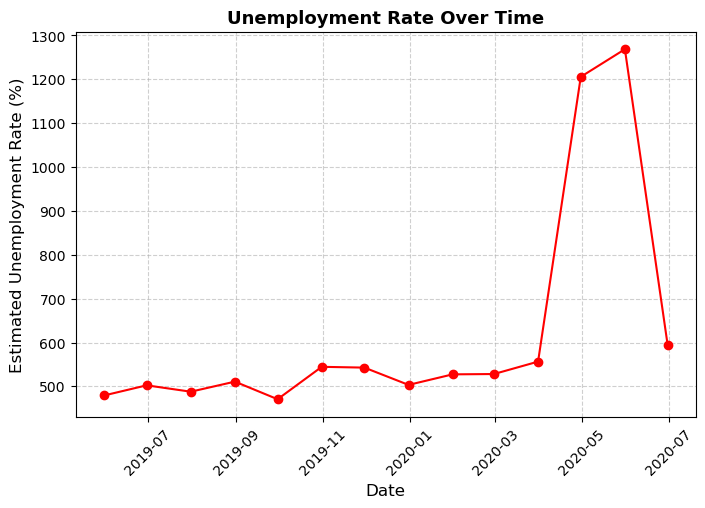

In [144]:
# Unemployment rate over time (monthly)
monthly = df.groupby('Date')['Estimated Unemployment Rate (%)'].sum()


fig, ax = plt.subplots(figsize = (8,5))
ax.plot(monthly.index,monthly.values, color = 'red', marker = 'o' )
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Estimated Unemployment Rate (%)", fontsize=12)
ax.set_title("Unemployment Rate Over Time", fontsize=13, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [73]:
# Unemployment Rate State Wise 
region_wise = df.groupby('Region')['Estimated Unemployment Rate (%)'].sum()

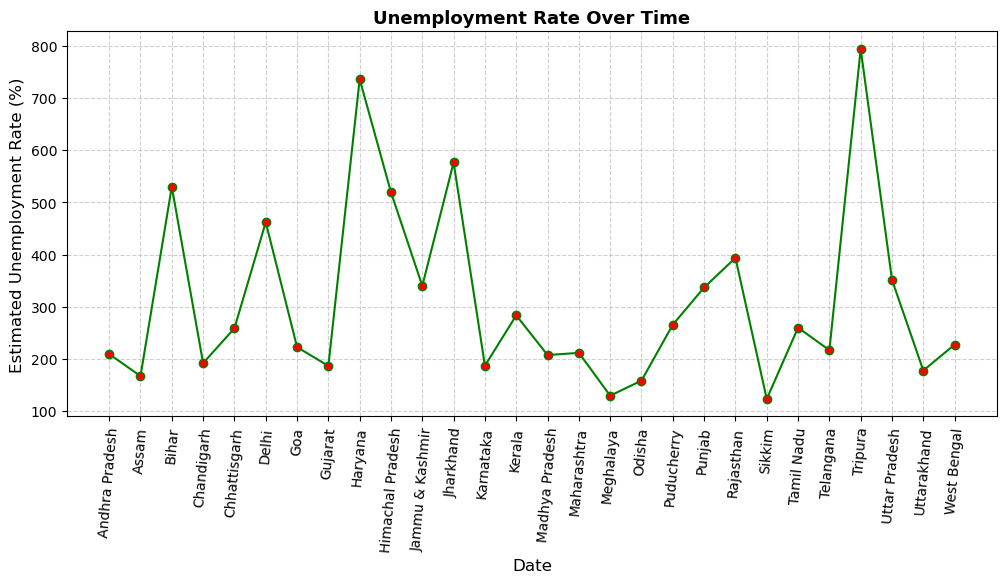

In [102]:
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(region_wise.index,region_wise.values, color = 'green', marker = 'o', markerfacecolor='red' )
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Estimated Unemployment Rate (%)", fontsize=12)
ax.set_title("Unemployment Rate Over Time", fontsize=13, fontweight='bold')
plt.xticks(rotation=85)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [105]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


<Axes: ylabel='Estimated Unemployment Rate (%)'>

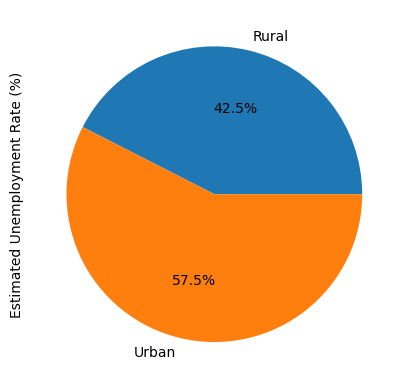

In [119]:
df.groupby('Area')['Estimated Unemployment Rate (%)'].sum().plot(kind='pie', color = 'red',autopct ='%0.01f%%')

In [120]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


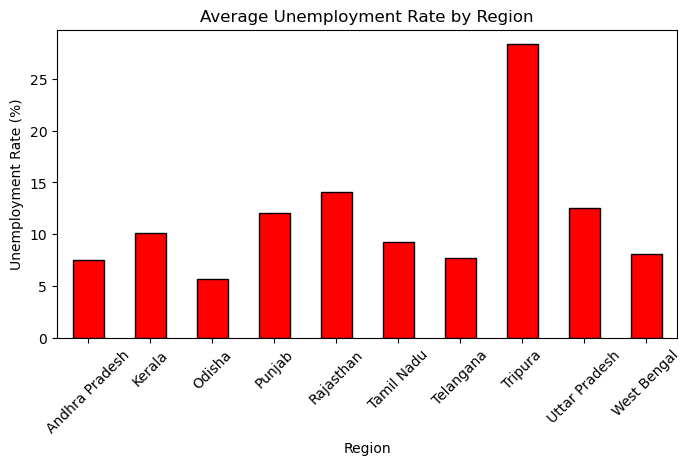

In [138]:
top_regions = df['Region'].value_counts().head(10).index
region_data = df[df['Region'].isin(top_regions)]

region_avg = region_data.groupby('Region')['Estimated Unemployment Rate (%)'].mean()

region_avg.plot(kind='bar', color='red', edgecolor='black', figsize = (8,4))
plt.title("Average Unemployment Rate by Region")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.show()


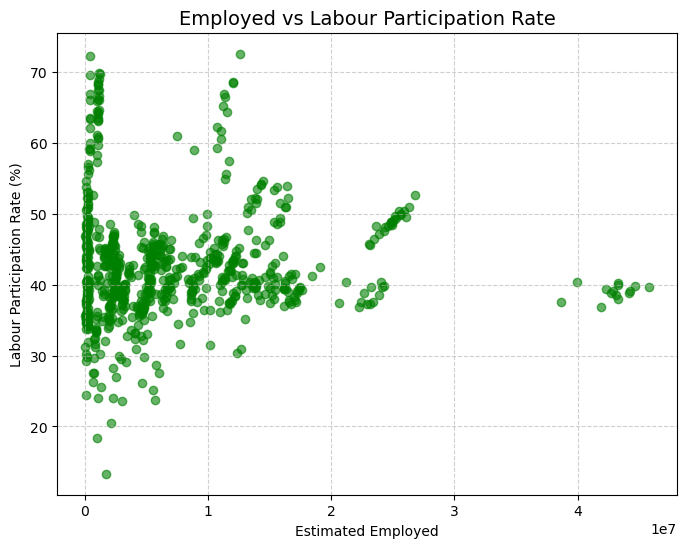

In [142]:
# Scatter plot
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df["Estimated Employed"], df["Estimated Labour Participation Rate (%)"], 
           alpha=0.6, c="green")

ax.set_title("Employed vs Labour Participation Rate", fontsize=14)
ax.set_xlabel("Estimated Employed")
ax.set_ylabel("Labour Participation Rate (%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()